In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv')

In [ ]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


# Problem Statement

In this data, we have one independent variable (Features) "Hours of Study" and one dependent variable (Target) "Marks". You have train a SVR model to understand the relationship between the Hours of Study and Marks of the student to predict the student's marks based on their number of hours dedicated to studies

In [ ]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [ ]:
df.tail() # we have 100 dta points i.e 0-99

,Hours of Study,Marks
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958
99,25.128485,53.454394


In [ ]:
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours of Study  100 non-null    float64
 1   Marks           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
df['Hours of Study'].isnull()

,Hours of Study
0,False
1,False
2,False
3,False
4,False
...,...
95,False
96,False
97,False
98,False


In [ ]:
df['Marks'].isnull()

,Marks
0,False
1,False
2,False
3,False
4,False
...,...
95,False
96,False
97,False
98,False


In [ ]:
df.isnull().sum()

,0
Hours of Study,0
Marks,0


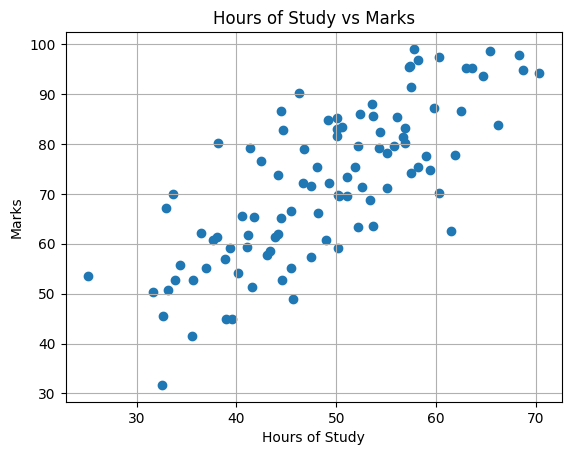

In [ ]:
plt.scatter(df['Hours of Study'],df['Marks'])
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.title('Hours of Study vs Marks')
plt.grid()
plt.show()

In [ ]:
df.corr()

,Hours of Study,Marks
Hours of Study,1.00000,0.76477
Marks,0.76477,1.00000


<Axes: >

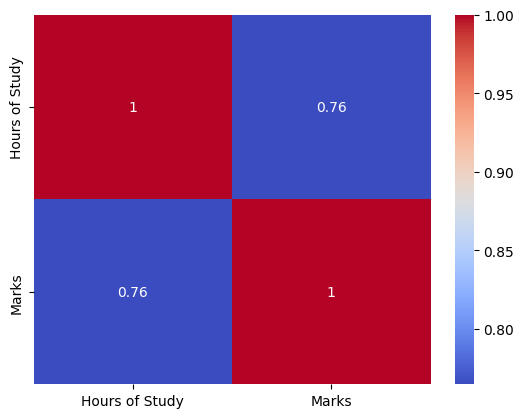

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


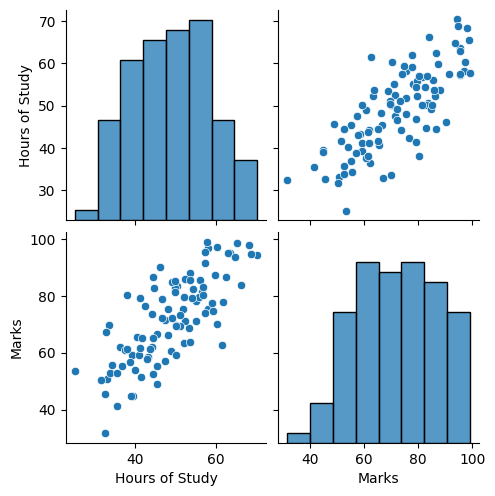

In [ ]:
sns.pairplot(df)

Text(0, 0.5, 'Hours of Study')

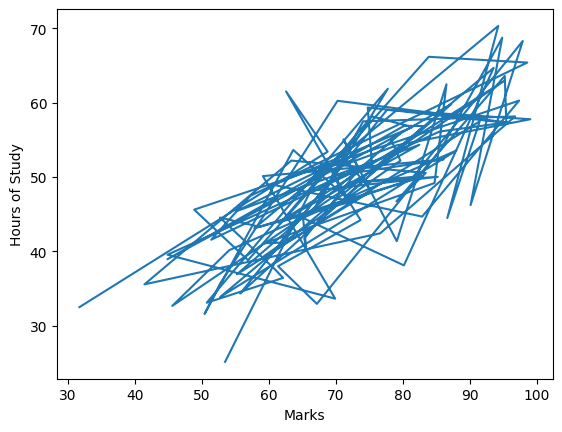

In [ ]:
plt.plot(df['Marks'],df['Hours of Study'])
plt.xlabel('Marks')
plt.ylabel('Hours of Study')

FEATURE SCALING
1)STANDARDIZATION
2)NORMALIZATION


In [ ]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


we use from sklearn.preprocessing import StandardScalar

In [ ]:
# FEATURE SCALING MEAND=S IT ROUNDS UP ALL THE VALUES OF THE FEATURES IN RANGE OF `1 TO -1 SO THAT THE MACHINE CAN EASILY UNDERSTAND
from sklearn.preprocessing import StandardScaler #standardization

In [ ]:
x=np.array(df['Hours of Study'])
y=np.array(df['Marks'])

In [ ]:
x

array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
       55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
       45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
       48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754,
       66.18981661, 65.41605175, 47.48120861, 41.57564262, 51.84518691,
       59.37082201, 57.31000344, 63.61556125, 46.73761941, 50.55676015,
       52.22399609, 35.56783005, 42.43647694, 58.16454011, 57.50444762,
       45.44053073, 61.89622268, 33.09383174, 36.43600951, 37.67565486,
       44.55560838, 43.31828263, 50.07314563, 43.87061265, 62.99748075,
       32.66904376, 40.16689901, 53.57507753, 33.86421497, 64.70713867,
       38.11982403, 44.50253806, 40.59953838, 41.72067636, 51.08863468,
       55.0780959 , 41.37772653, 62.49469743, 49.20388754, 41.10268519,
       41.18201611, 50.18638949, 52.37844622, 50.13548549, 33.64470601,
       39.55790122, 56.13038882, 57.36205213, 60.26921439, 35.67

In [ ]:
y

array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
       78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
       55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
       60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319,
       83.87856466, 98.5912173 , 57.25181946, 51.39174408, 75.38065167,
       74.76556403, 95.45505292, 95.22936602, 79.05240617, 83.43207142,
       63.35879032, 41.4128853 , 76.61734128, 96.76956643, 74.08413012,
       66.58814441, 77.76848242, 50.71958891, 62.12457082, 60.81024665,
       52.68298337, 58.56982472, 82.90598149, 61.4247098 , 95.2441528 ,
       45.57058882, 54.0840548 , 87.99445276, 52.72549438, 93.57611869,
       80.16627545, 65.10171157, 65.56230126, 65.28088692, 73.43464155,
       71.13972786, 79.10282968, 86.52053844, 84.74269781, 59.35885025,
       61.68403752, 69.84760416, 86.09829121, 59.10883927, 69.89968164,
       44.86249071, 85.49806778, 95.53668685, 70.25193442, 52.72

* STANDARD SCALING applying

In [ ]:
stanscale=StandardScaler()

In [ ]:
x = stanscale.fit_transform(np.array(x).reshape(-1, 1))
# Reshape x to a 2D array with one column using reshape(-1, 1)

In [ ]:
y=stanscale.fit_transform(np.array(y).reshape(-1, 1))

In [ ]:
import numpy as np

# Example with a 1D array
arr_1d = np.array([1, 2])
arr_2d = arr_1d.reshape(-1, 1)
print(arr_2d)

[[1]
 [2]]


In [ ]:
x # so here the values now converted in range of -1 to 1 that is it is standardized as we applied standardscaler [ 4.60783817e-01], 4 to the power -1 =0.4


array([[-1.69692744e+00],
       [ 4.60783817e-01],
       [ 1.29641497e+00],
       [-1.52894871e-01],
       [ 1.11934400e+00],
       [ 6.37672702e-01],
       [ 3.35493359e-01],
       [-9.96004115e-01],
       [-8.79915004e-02],
       [ 3.70370068e-01],
       [-3.64898398e-01],
       [ 5.56151537e-01],
       [-4.94383049e-01],
       [ 9.49740196e-01],
       [ 8.01118494e-01],
       [-2.52939962e-04],
       [-4.40436632e-01],
       [ 1.16926591e+00],
       [-3.44386604e-01],
       [-1.04578477e+00],
       [ 1.77689413e+00],
       [ 1.69710419e+00],
       [-1.52320603e-01],
       [-7.61297225e-01],
       [ 2.97688891e-01],
       [ 1.07372557e+00],
       [ 8.61215827e-01],
       [ 1.51143924e+00],
       [-2.28998849e-01],
       [ 1.64827489e-01],
       [ 3.36751351e-01],
       [-1.38081742e+00],
       [-6.72528769e-01],
       [ 9.49334875e-01],
       [ 8.81266735e-01],
       [-3.62753460e-01],
       [ 1.33414261e+00],
       [-1.63593389e+00],
       [-1.2

In [ ]:
y

array([[-2.66651176],
       [-0.21538463],
       [-0.62633786],
       [-0.03229448],
       [ 1.00475931],
       [ 0.40839133],
       [ 0.50297376],
       [-0.85054551],
       [ 0.21794595],
       [-0.04854375],
       [-1.11541194],
       [ 0.69054936],
       [-0.66293287],
       [ 0.22202084],
       [ 0.62160848],
       [-0.74791896],
       [ 0.71790058],
       [ 1.67581471],
       [-1.5331961 ],
       [-1.00224427],
       [ 0.78309945],
       [ 1.75590787],
       [-0.9774751 ],
       [-1.3649464 ],
       [ 0.22121292],
       [ 0.180543  ],
       [ 1.54854301],
       [ 1.53362047],
       [ 0.46399128],
       [ 0.75357708],
       [-0.57367894],
       [-2.02475385],
       [ 0.3029835 ],
       [ 1.63545934],
       [ 0.13548623],
       [-0.36015233],
       [ 0.37909756],
       [-1.40938966],
       [-0.65528619],
       [-0.74219   ],
       [-1.27956897],
       [-0.89032789],
       [ 0.71879173],
       [-0.70156137],
       [ 1.53459818],
       [-1

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

importing svr model

In [ ]:
from sklearn.svm import SVR

In [ ]:
model=SVR(kernel='rbf')

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([-0.76947139,  0.62495329, -0.36605346, -1.26283815,  0.57381597,
       -0.1185472 , -0.75664008, -0.40417142, -0.99623181,  0.95262628,
        1.07387222,  0.35030893, -0.56328734, -0.52093818,  0.07543078,
        1.22551728,  1.33758452,  0.67596748, -0.56967027, -0.64786557])

In [ ]:
y_test

array([[-1.00224427],
       [ 0.62160848],
       [-0.70156137],
       [-1.40938966],
       [ 0.89018186],
       [-0.03229448],
       [-1.79768014],
       [-0.89032789],
       [-0.65528619],
       [-0.11790059],
       [-0.62633786],
       [-0.21538463],
       [-0.68441449],
       [-0.44658889],
       [ 0.62827334],
       [ 1.46933383],
       [ 1.50879256],
       [ 1.54854301],
       [-0.8381571 ],
       [-1.18692938]])

In [ ]:
# if we want to revert standardization ,i.e remove -1 to 1 and see actual values we follow the syntax
# y_pred=stanscale.inverse_transform(y_pred)
# y_test=stanscale.inverse_transform(y_test)

In [ ]:
y_pred = stanscale.inverse_transform(y_pred.reshape(-1, 1))
# Reshape y_pred to a 2D array with one column
# using .reshape(-1,1) before applying inverse_transform.

In [ ]:
y_test = stanscale.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
y_pred

array([[60.39764577],
       [81.48677868],
       [66.49889641],
       [52.93601862],
       [80.71338315],
       [70.24215505],
       [60.59170512],
       [65.92240434],
       [56.96814488],
       [86.44247075],
       [88.27618157],
       [77.33308614],
       [63.51595177],
       [64.15643611],
       [73.17585776],
       [90.56964555],
       [92.26453877],
       [82.25831189],
       [63.41941707],
       [62.23679956]])

In [ ]:
y_test

array([[56.87721319],
       [81.43619216],
       [61.4247098 ],
       [50.71958891],
       [85.49806778],
       [71.54663223],
       [44.84712424],
       [58.56982472],
       [62.12457082],
       [70.25193442],
       [62.5623823 ],
       [68.77759598],
       [61.68403752],
       [65.28088692],
       [81.53699078],
       [94.25710159],
       [94.85387123],
       [95.45505292],
       [59.35885025],
       [54.0840548 ]])

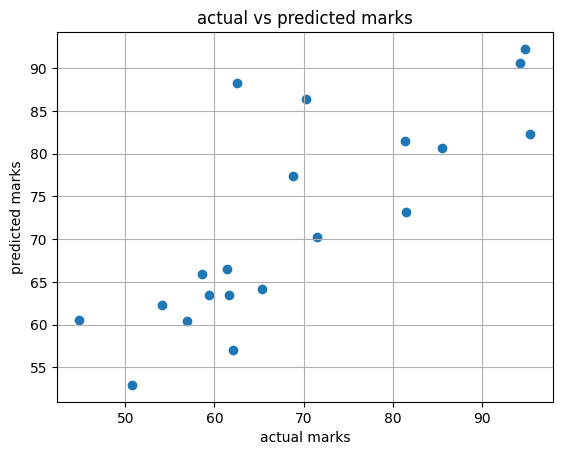

In [ ]:
plt.scatter(y_test,y_pred) #in y=df['marks'] we have marks in variable y, that got split testing and training and model predicts
plt.xlabel('actual marks')
plt.ylabel('predicted marks')
plt.title('actual vs predicted marks')
plt.grid()
plt.show()

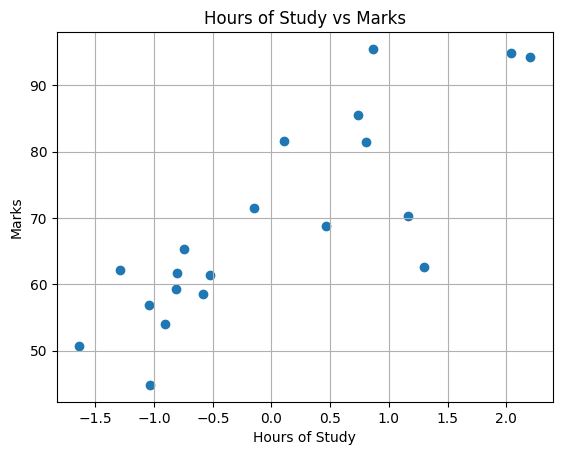

In [ ]:
plt.scatter(x_test,y_test)
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.title('Hours of Study vs Marks')
plt.grid()
plt.show()

In [ ]:
model.score(x_test,y_test)

-22.099949752331796

In [ ]:
r2_score(y_test,y_pred)#60% accuracy

0.5943071038285547

In [ ]:
mean_squared_error(y_test,y_pred)

87.23306900235274

In [ ]:
mean_absolute_error(y_test,y_pred)

6.933427431006029